In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
# !pip install kaggle
# Read the data
# X = pd.read_csv('./input/train.csv', index_col='id')
path =  Path('./input')
# X = pd.read_csv('./input/train.csv', index_col=0)
df = pd.read_csv(path/'train.csv', index_col=0)
X_test_full = pd.read_csv('./input/test.csv', index_col='id')
# X.describe()
# print(X)
# X.shape
# !dir {path}
# X.head()
df.iloc[0:]

,premise,hypothesis,lang_abv,language,label
id,,,,,
5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...
2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2


In [5]:
df.describe(include='object')

,premise,hypothesis,lang_abv,language
count,12120,12120,12120,12120
unique,8209,12119,15,15
top,and these comments were considered in formulat...,I am not sure.,en,English
freq,3,2,6870,6870


In [6]:
df['input'] = 'TEXT1: ' + df.premise + '; TEXT2: ' + df.hypothesis + '; ANC1: ' + str(df.label)

In [7]:
# X.columns
# Y =X.premise
# Y.head()
# X_features = ['premise', 'hypothesis', 'language']
# Xf = X[X_features]
# Xf.describe()
# Xf.head()
input = df.input.head()
input.iloc[0:]

id
5130fd2cb5    TEXT1: and these comments were considered in f...
5b72532a0b    TEXT1: These are issues that we wrestle with i...
3931fbe82a    TEXT1: Des petites choses comme celles-là font...
5622f0c60b    TEXT1: you know they can't really defend thems...
86aaa48b45    TEXT1: ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จ...
Name: input, dtype: object

In [8]:
# X_test_full.describe()
# print(X_test_full)
# X_test_full.shape
X_test_full.head()

,premise,hypothesis,lang_abv,language
id,,,,
c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [9]:
# ! pip uninstall -y pyarrow datasets
# ! pip install --no-cache-dir pyarrow datasets
from datasets import Dataset, DatasetDict
ds = Dataset.from_pandas(df)

In [10]:
ds

Dataset({
    features: ['premise', 'hypothesis', 'lang_abv', 'language', 'label', 'input', 'id'],
    num_rows: 12120
})

In [11]:
# model_nm = 'microsoft/deberta-v3-small'

In [17]:
# !pip install transformers
# !pip install tiktoken
# !pip install --upgrade ipywidgets
from transformers import AutoModelForSequenceClassification,AutoTokenizer
# tokz = AutoTokenizer.from_pretrained(model_nm)
# from transformers import AutoTokenizer
# tokz = AutoTokenizer.from_pretrained("microsoft/deberta-v3-base", use_fast=False)  # Replace with your model name
tokz = AutoTokenizer.from_pretrained("microsoft/deberta-base")  # Example fallback

# !pip install --upgrade ipywidgets jupyterlab_widgets
# jupyter lab clean  # Clears cached assets
# jupyter lab build  # Rebuilds JupyterLab with correct versions

# !pip install --upgrade torch torchvision torchaudio

# !pip install -U transformers
# from transformers import pipeline

# pipe = pipeline("fill-mask", model="microsoft/deberta-v3-small")
# # # Load model directly
# from transformers import AutoModel
# model = AutoModel.from_pretrained("microsoft/deberta-v3-small")
tokz.tokenize("G'day folks, I'm Jeremy from fast.ai!")

['G',
 "'d",
 'ay',
 'Ġfolks',
 ',',
 'ĠI',
 "'m",
 'ĠJeremy',
 'Ġfrom',
 'Ġfast',
 '.',
 'ai',
 '!']

In [18]:
tokz.tokenize("A platypus is an ornithorhynchus anatinus.")

['A',
 'Ġplat',
 'yp',
 'us',
 'Ġis',
 'Ġan',
 'Ġorn',
 'ith',
 'or',
 'h',
 'yn',
 'ch',
 'us',
 'Ġan',
 'atin',
 'us',
 '.']

In [19]:
def tok_func(x): return tokz(x["input"])

In [20]:
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/12120 [00:00<?, ? examples/s]

In [21]:
row = tok_ds[0]
row['input'], row['input_ids']

('TEXT1: and these comments were considered in formulating the interim rules.; TEXT2: The rules developed in the interim were put together with these comments in mind.; ANC1: id\n5130fd2cb5    0\n5b72532a0b    2\n3931fbe82a    0\n5622f0c60b    0\n86aaa48b45    1\n             ..\n2b78e2a914    2\n7e9943d152    0\n5085923e6c    2\nfc8e2fd1fe    2\n44301dfb14    0\nName: label, Length: 12120, dtype: int64',
 [1,
  49347,
  134,
  35,
  8,
  209,
  1450,
  58,
  1687,
  11,
  1026,
  11539,
  5,
  6375,
  1492,
  10116,
  36367,
  176,
  35,
  20,
  1492,
  2226,
  11,
  5,
  6375,
  58,
  342,
  561,
  19,
  209,
  1450,
  11,
  1508,
  10116,
  11399,
  134,
  35,
  13561,
  50118,
  4708,
  541,
  37379,
  176,
  38133,
  245,
  1437,
  1437,
  1437,
  321,
  50118,
  245,
  428,
  33741,
  2881,
  102,
  288,
  428,
  1437,
  1437,
  1437,
  132,
  50118,
  3416,
  2983,
  506,
  1610,
  6551,
  102,
  1437,
  1437,
  1437,
  321,
  50118,
  4419,
  2036,
  506,
  288,
  438,
  2466,


In [ ]:
# tokz.vocab['▁of']
tokz.vocab['Ġof']

9

In [27]:
# tok_ds = tok_ds.rename_columns({'score':'labels'})
# tok_ds = tok_ds.rename_columns({'labels':'labels'})

In [28]:
eval_df = pd.read_csv(path/'test.csv')
eval_df.describe()

,id,premise,hypothesis,lang_abv,language
count,5195,5195,5195,5195,5195
unique,5195,4336,5195,15,15
top,c6d58c3f69,The movie isn't clear on where the secret repo...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",en,English
freq,1,3,1,2945,2945


In [29]:
def f(x): return -3*x**2 + 2*x + 20

In [30]:
f(3)

-1

In [31]:
import numpy as np, matplotlib.pyplot as plt

def plot_function(f, min=-2.1, max=2.1, color='r'):
    x = np.linspace(min,max, 100)[:,None]
    plt.plot(x, f(x), color)

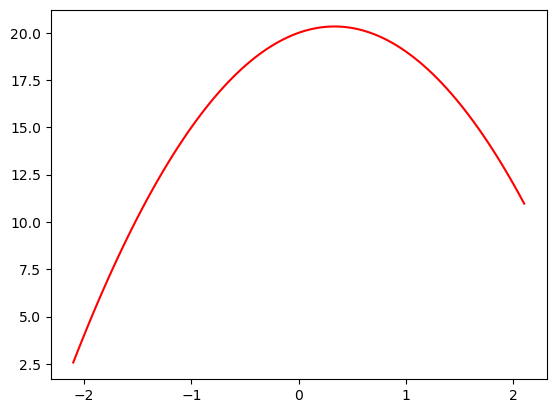

In [32]:
plot_function(f)

In [33]:
# X_test_full.columns
from numpy.random import normal,seed,uniform
np.random.seed(42)

In [34]:
def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

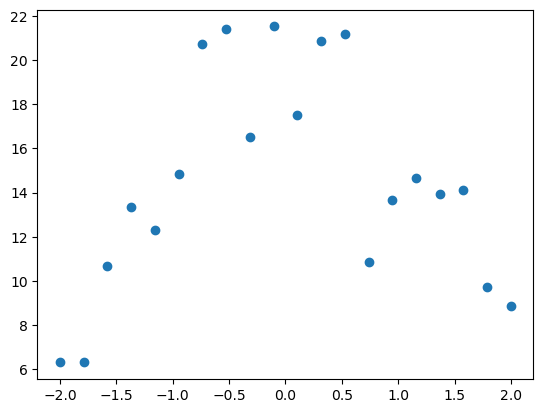

In [35]:
x = np.linspace(-2, 2, num=20)[:,None]
y = add_noise(f(x), 0.2, 1.3)
plt.scatter(x,y);

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plot_poly(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    plt.scatter(x,y)
    plot_function(model.predict)

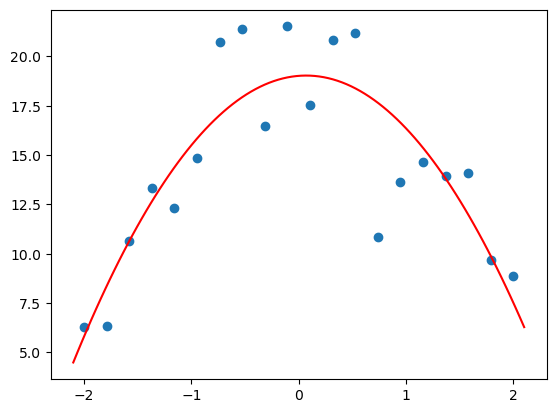

In [49]:
plot_poly(2)

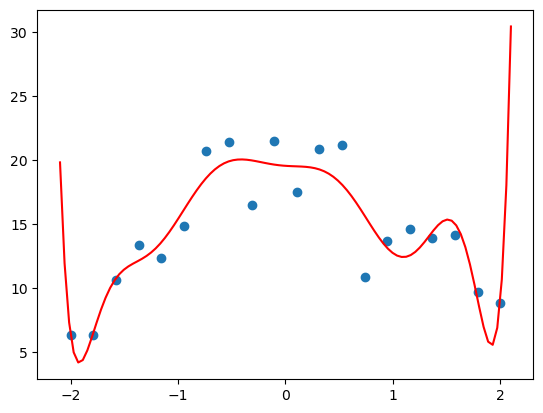

In [50]:
plot_poly(10)

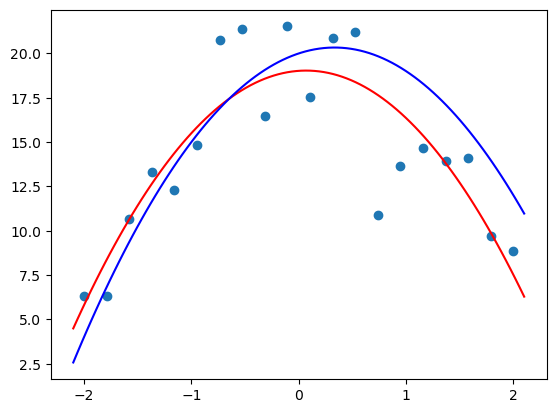

In [51]:
plot_poly(2)
plot_function(f, color='b')

In [60]:
dds = tok_ds.train_test_split(0.25, seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'lang_abv', 'language', 'labels', 'input', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9090
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'lang_abv', 'language', 'labels', 'input', 'id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3030
    })
})

In [67]:
# eval_df['input'] = 'TEXT1: ' + eval_df.context + '; TEXT2: ' + eval_df.target + '; ANC1: ' + eval_df.anchor
# eval_df['input'] = 'TEXT1: ' + df.premise + '; TEXT2: ' + df.hypothesis + '; ANC1: ' + str(df.label)
# eval_df['input'] = 'TEXT1: ' + df.premise + '; TEXT2: ' + df.hypothesis + '; ANC1: ' + df.label.astype(str)
# eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)
eval_df['input'] = eval_df.apply(
    lambda row: f"TEXT1: {df.premise}; TEXT2: {df.hypothesis}; ANC1: {df.label}", 
    axis=1
)
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/5195 [00:00<?, ? examples/s]

In [ ]:
# dropna drops missing values (think of na as "not available")
Xna=X.dropna(axis=0)
Xna.shape

NameError: name 'X' is not defined

In [ ]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})

In [ ]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

In [ ]:
pd.Series([1, 2, 3, 4, 5])

In [ ]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')